___
___
# <center> TEORÍA DE GRÁFICAS 2021 </center>
___
___

A continuación se presenta un -Jupyter Notebook- sobre los algoritmos vistos en la clase Teoría de Gráficas 2022-1 impartida por el Dr. Cesar Hernandez.

El contenido de este -Notebook- es el siguiente:
- [Librerías Utilizadas](#lib)
- [Funciones de conversión de estructura de datos](#fun1)
- [Función para crear una gráfica (dirigida o no) (sin pesos y con pesos)](#fun2)
- [Función para mostrar la gráfica usando Networkx](#fun3)
- [INSTRUCCIÓN 1: CREAR GRÁFICA SIN PESOS](#ins1)
- [INSTRUCCIÓN 2: CREAR GRÁFICA CON PESOS](#ins2)
- [ALGORITMOS](#alg)
- [INSTRUCCIÓN 3: VERIFICAR SI LA SUCESIÓN ES GRÁFICA](#alg1)
- [INSTRUCCIÓN 4: RECORRER LA GRÁFICA CON DFS](#alg2)
- [INSTRUCCIÓN 5: RECORRER LA GRÁFICA CON BFS](#alg3)
- [INSTRUCCIÓN 6: ÁRBOL ÓPTIMO CON PRIM](#alg4)
- [INSTRUCCIÓN 7: ÁRBOL ÓPTIMO CON KRUSKAL](#alg5)
- [INSTRUCCIÓN 8: RUTA MÁS CORTA CON DIJKSTRA](#alg6)




<a name="lib"></a>
___
___
### <center>Librerías utilizadas </center>
___
___
Se utilizaron las librerías ***numpy*** para las estructuras de datos y ***networkx*** para visualización.

In [1]:
# Librerías
import numpy as np
import networkx as nx

<a name="fun1"></a>
___
___
### <center> Funciones de conversion de estructura de datos</center>
___
___

Funciones para convertir entre las distintas estructuras de datos para el manejo de gráficas en los distintos algoritmos.

- ***convert_list_mat:*** Convierte lista de adyacencia en matriz de adyacencia.
- ***convert_list_mat_ponderada:*** Convierte lista de adyacencia ponderada en matriz de adyacencia ponderada.
- ***convert_mat_list:*** Convierte matriz de adyacencia en lista de adyacencia no ponderada
- ***convert_list_dict*** Convierte lista de adyacencia de tipo lista a tipo diccionario.
- ***convert_dict_list*** Convierte lista de adyacencia de tipo diccionario a tipo lista.
- ***convert_list2_listady*** Convierte lista de adyacencia tuple a tipo lista tradicional.


In [2]:
def convert_list_mat(list_ady):
    """ Convertir de lista de adyacencia a matriz de adyacencia sin pesos.
    :param list_ady: Lista de adyacencia.
    :return: Matriz de adyacencia sin pesos.
    """
    n = len(list_ady)
    mat_ady = np.nan * np.ones((n,n))
    np.fill_diagonal(mat_ady,0)

    for i in range(n):
        for j in list_ady[i]:
            mat_ady[i,j] = 1
    return np.nan_to_num(mat_ady)

def convert_list_mat_ponderada(list_ady):
    """ Convertir de lista de adyacencia a matriz de adyacencia.
    :param list_ady: Lista de adyacencia.
    :return: Matriz de adyacencia con los pesos.
    """
    n = len(list_ady)
    mat_ady = np.nan * np.ones((n,n))
    np.fill_diagonal(mat_ady,0)

    for i in range(n):
        for j,w in list_ady[i]:
            mat_ady[i,j] = w
    return np.nan_to_num(mat_ady)

def convert_mat_list(mat_ady):
    """ Convertir de matriz de adyacencia sin pesos a lista de adyacencia.
    :param mat_ady: Matriz de adyacencia.
    :return: Lista de adyacencia sin pesos.
    """
    list_ady = []
    for i in mat_ady:
        list_ady_i = []
        contador = 0
        for j in i:
            contador = contador + 1
            if j > 0:
                list_ady_i.append(contador-1)
        list_ady.append(list_ady_i)
    return list_ady

def convert_list_dict(list_ady):
    """ Convertir de lista de adyacencia a diccionario.
    :param list_ady: Lista de adyacencia tipo lista.
    :return: Diccionario de la lista de adyacencia.
    """
    labels = [item for item in range(0, len(list_ady)-1)]
    zip_dict = zip(labels, list_ady)
    return dict(zip_dict)

def convert_dict_list(dict_ady):
    """ Convertir de lista de adyacencia (diccionario) a lista.
    :param dict_ady: Lista de adyacencia tipo diccionario.
    :return: Lista de los valores del diccionario.
    """
    return list(dict_ady.values())

def convert_list2_listady(list2, n):
    """ Convertir de formato de lista tuple [inicial, final, peso] a [[final, peso]]
    :param list2: Lista de adyacencia Tuple
    :param n: Número de Vértices
    :return: Lista de adyacencia tipo lista.
    """
    lista_ady_ponderada = [[] for i in range(n)]
    for i in list2:
        lista_ady_ponderada[i[0]].append((i[1],i[2]))
    return lista_ady_ponderada

<a name="fun2"></a>
___
___
### <center> Función para crear una gráfica </center>
___
___

Si se desea crear una gráfica, la función te devuelve la gráfica interpretada como lista, diccionario y matriz de adyacencia. Además se muestra la gráfica usando **networkx** únicamente como visualizador.

### GRÁFICA NO PONDERADA

La función ***crear_grafica*** crea una gráfica no ponderada, pero que puede ser Dirigida o no (Mediante un True o False). Uno puede configurar además el orden de la gráfica (n) y el número de aristas (m).


Con la función **crear_grafica(False, n = 3 , m = 3)** podemos crear $K3$ haciendo la siguiente configuración:

$0 \rightarrow 1 $, $1 \rightarrow 2 $, $2 \rightarrow 0$

![](C3.png)

También podemos crearla dirigida cambiando el False por True. **crear_grafica(True, n = 3 , m = 3)**, usamos la misma configuración y obtenemos.

![](k3_d.png)




Creamos K3 NO dirigido y NO ponderado con las siguientes aristas:

0 -> 1 
1 -> 2 
2 -> 0

Lista de Adyacencia
[[1], [2], [0]]

Matriz de Adyacencia
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


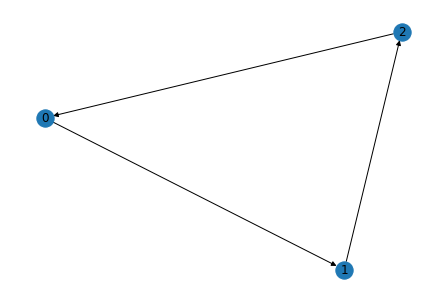

In [3]:
def crear_grafica(digrafica = True, n = 1, m = 0):
    """ Función para crear una gráfica no ponderada.
    :param digrafica: True cuando se quiere una gráfica dirigida, False cuando no.
    :param n: Número de vértices u orden de la gráfica.
    :param m: Número de aristas de a gráfica.
    :return: lista de adyacencia, matriz de adyacencia y la gráfica con la función draw() de Networkx.
    """
    lista_adyacencia = [[] for i in range(n)]

    def agregar_arista(u,v,digraf = True):
        lista_adyacencia[u].append(v)
        if not digraf:
            lista_adyacencia[v].append(u)

    for i in range(0,m):
            agregar_arista(int(input("SOLO NÚMEROS DEL 0 AL " + str(n-1) + "\n\nARISTA " + str(i+1) + "\nVértice inicial: ")), int(input("SOLO NÚMEROS DEL 0 AL " + str(n-1) + "\n\nARISTA " + str(i+1) + "\nVértice final: ")),digrafica)

    print("\nLista de Adyacencia")
    print(lista_adyacencia)

    print("\nMatriz de Adyacencia")
    matriz_adyacencia = convert_list_mat(lista_adyacencia)
    print(matriz_adyacencia)

    if digrafica:
        dG = nx.DiGraph(matriz_adyacencia)
    if not digrafica:
        dG = nx.Graph(matriz_adyacencia)
    nx.draw(dG, with_labels=True)

    return lista_adyacencia, matriz_adyacencia

## Crear K3
print("Creamos K3 NO dirigido y NO ponderado con las siguientes aristas:")
print("\n0 -> 1 \n1 -> 2 \n2 -> 0")

lista1, matriz1 = crear_grafica(True,3,3) # False para que no sea dirigida.

### GRÁFICA PONDERADA

La función ***crear_grafica_ponderada*** crea una gráfica ponderada, pero que puede ser Dirigida o no (Mediante un True o False). Uno puede configurar además el orden de la gráfica (n) y el número de aristas (m).


Con la función **crear_grafica(False, n = 3 , m = 3)** podemos crear $K3$ haciendo la siguiente configuración:

$0 \rightarrow 1: 10 $, $1 \rightarrow 2: 20 $, $2 \rightarrow 0: 30$

![](k3_pnd.png)

También podemos crearla dirigida cambiando el False por True. **crear_grafica(True, n = 3 , m = 3)**, usamos la misma configuración y obtenemos.

![](k3_p.png)

Creamos K3 dirigido y ponderado con las siguientes aristas:

0 -> 1: 10 
1 -> 2: 15 
2 -> 0: 30

Lista de Adyacencia
[[(1, 10), (2, 30)], [(0, 10), (2, 15)], [(1, 15), (0, 30)]]

Matriz de Adyacencia
[[ 0. 10. 30.]
 [10.  0. 15.]
 [30. 15.  0.]]


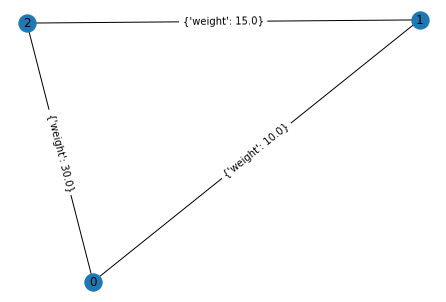

In [4]:
def crear_grafica_ponderada(digrafica = True,n = 1, m = 0):
    """ Con esta función se puede generar una lista de adyacencia ponderada y una matriz de adyacencia ponderada.
    :param digrafica: Elegir si será digráfica (True) o no (False).
    :param n: Orden de la gráfica.
    :param m: Número de aristas de la gráfica.
    :return: lista de adyacencia ponderada, matriz de adyacencia ponderada y la gráfica con la función draw() de Networkx.
    """
    lista_adyacencia = [[] for i in range(n)]

    def agregar_arista(u,v,w):
        lista_adyacencia[u].append((v,w))
        if not digrafica:
            lista_adyacencia[v].append((u,w))

    for i in range(0,m):
            agregar_arista(int(input("SOLO NÚMEROS DEL 0 AL " + str(n-1) + "\n\nARISTA " + str(i+1) + "\nVértice inicial: ")), int(input("SOLO NÚMEROS DEL 0 AL " + str(n-1) + "\n\nARISTA " + str(i+1) + "\nVértice final: ")),int(input("ASIGNAR PESO A ARISTA")))

    print("\nLista de Adyacencia")
    print(lista_adyacencia)
    print("\nMatriz de Adyacencia")
    matriz_adyacencia = convert_list_mat_ponderada(lista_adyacencia)
    print(matriz_adyacencia)

    if digrafica:
        dG = nx.DiGraph(matriz_adyacencia)
        layout = nx.spring_layout(dG)
    if not digrafica:
        dG = nx.Graph(matriz_adyacencia)
        layout = nx.spring_layout(dG)
    nx.draw(dG, layout, with_labels=True)
    nx.draw_networkx_edge_labels(dG, pos=layout)

    return lista_adyacencia, matriz_adyacencia

# EJEMPLO CON k3
print("Creamos K3 dirigido y ponderado con las siguientes aristas:")
print("\n0 -> 1: 10 \n1 -> 2: 15 \n2 -> 0: 30")
lista2, matriz2 = crear_grafica_ponderada(False,3,3) # True para que sea dirigida

<a name="fun3"></a>
___
___
### <center> Mostrar gráfica </center>
___
___

La función ***plot_grafica*** utiliza las funciones de la librería **networkx**, usando la matriz de adyacencia y como parámetros si es digráfica o no (True or False) o si es gráfica ponderada (True or false).

A continuación se muestra la gráfica de Petersen, véase la configuración de la función: 

plot_grafica( gráfica de petersen, No dirigida, No ponderada) 


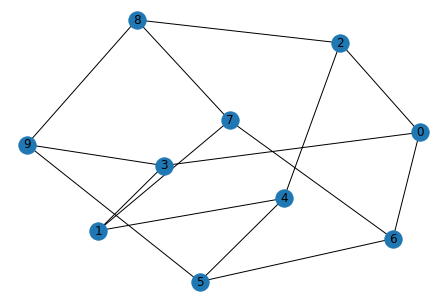

In [5]:
def plot_grafica(mat_ady, digrafica = True, ponderada = False):
    """ Función para mostrar gráfica, usando a la librería networkx.
    :param mat_ady: Gráfica en formato Matriz de Adyacencia.
    :param digrafica: Elegir si la gráfica será dirigida (True) o no (False).
    :param ponderada: Elegir si la gráfica será ponderada (True) o no (False).
    :return: Imagen de la gráfica.
    """
    if digrafica:
        dG = nx.DiGraph(mat_ady)
        layout = nx.spring_layout(dG)
    if not digrafica:
        dG = nx.Graph(mat_ady)
        layout = nx.spring_layout(dG)
    nx.draw(dG, layout, with_labels=True)
    if ponderada:
        nx.draw_networkx_edge_labels(dG, pos=layout)

### Gráfica de Petersen
PETERSEN_LIST = [[6, 3, 2], [7, 4, 3], [0, 4, 8], [0, 1, 9], [1, 2, 5], [4, 6, 9], [0, 5, 7], [1, 6, 8], [2, 7, 9], [3, 5, 8]]
PETERSEN_MAT = convert_list_mat(PETERSEN_LIST)

print("A continuación se muestra la gráfica de Petersen, véase la configuración de la función: \n\nplot_grafica( gráfica de petersen, No dirigida, No ponderada) ")
plot_grafica(PETERSEN_MAT, False, False)


Se muestra C5, no dirigido ni con pesos.


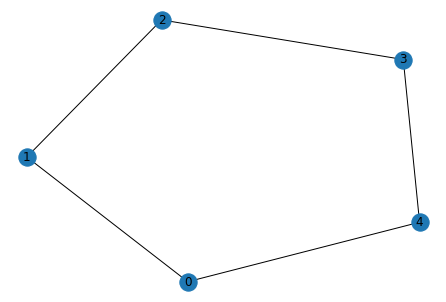

In [6]:
lista_C5 = [[1, 4], [0, 2], [1, 3], [2, 4], [3, 0]]
matriz_C5 = convert_list_mat(lista_C5)
print("Se muestra C5, no dirigido ni con pesos.")
plot_grafica(matriz_C5, False)

Se muestra K4, dirigido y con pesos.


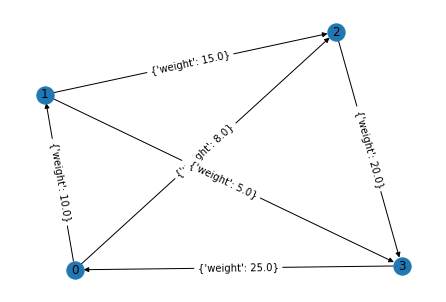

In [7]:
lista_K4 = [[(1, 10), (2, 8)], [(2, 15), (3, 5)], [(3, 20)], [(0, 25)]]
matriz_K4 = convert_list_mat_ponderada(lista_K4)
print("Se muestra K4, dirigido y con pesos.")
plot_grafica(matriz_K4, True, True)

<a name="ins1"></a>
___
___
___
## <center> *INSTRUCCIÓN 1: Cree su propia gráfica sin pesos* </center>
___

A continuación puede crear una gráfica sin pesos (dirigida o no), con el número de vértices y aristas deseados.

A partir de la creación de la gráfica usamos las variables ***nueva_lista*** y ***nueva_matriz*** para los algoritmos correspondientes a gráficas sin pesos.


Lista de Adyacencia
[[]]

Matriz de Adyacencia
[[0.]]


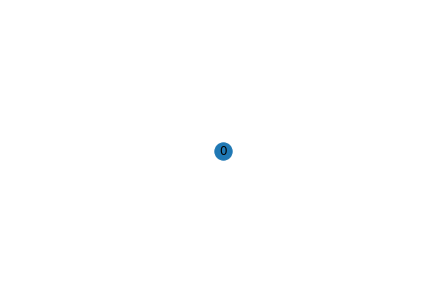

In [8]:
nueva_lista, nueva_matriz = crear_grafica(digrafica=True, n = 1, m = 0)

<a name="ins2"></a>
___
___
___
## <center> ***INSTRUCCIÓN 2: Cree su propia gráfica ponderada*** </center>
___

A continuación puede crear una gráfica PONDERADA (dirigida o no), con el número de vértices y aristas deseados.
A partir de la creación de la gráfica usamos las variables ***nueva_lista_ponderada*** y ***nueva_matriz_ponderada*** para los algoritmos correspondientes a gráficas sin pesos.




Lista de Adyacencia
[[(1, 10)], [(0, 10)]]

Matriz de Adyacencia
[[ 0. 10.]
 [10.  0.]]


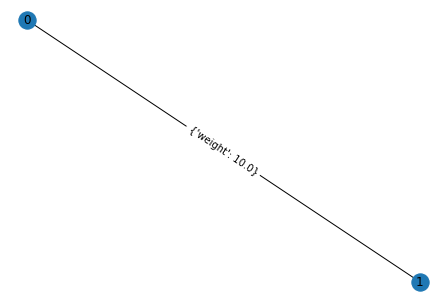

In [9]:
nueva_lista_ponderada, nueva_matriz_ponderada = crear_grafica_ponderada(digrafica=False, n = 2, m = 1)

<a name="alg"></a>
___
___
# <center> ALGORITMOS </center>
___
___

A continuación se presenta un notebook con los algoritmos vistos en clase. Los algoritmos pasados a python fueron los siguientes:

- Sucesión de grados para determinar si es gráfica
- Recorrido o exploración de gráficas con DFS y BFS
- Árboles óptimos (Prim)
- Ruta de menor peso (Dijkstra y Kruskal)
- Circuitos Eulerianos y Hamiltonianos
- Redes de flujo

___
___
___
## <center> SUCESIÓN DE GRADOS </center>

Con la función ***crear_sucesion(lista de adyacencia)*** podemos crear la sucesión de grados de la gráfica y devolver la lista de sucesión ordenada.

Con la función ***grafica_sucesion(lista de sucesión de grados)*** podemos verificar si la sucesión es gráfica.

In [10]:
def crear_sucesion(grafica):
    """ Función para crear una lista de sucesión de grados.
    :param grafica: Lista de Adyacencia de gráfica NO DIRIGIDA y NO PONDERADA.
    :return: Lista de sucesión de grados.
    """
    lista_grados = []
    for i in grafica:
        lista_grados.append(len(i))
    lista_grados.sort(reverse=True)
    return lista_grados

def grafica_sucesion(sucesion):
    """ Función para determinar si la suma de los grados son de una gráfica simple o no.
    :param sucesion: lista de sucesión de grados.
    :return: True si es gráfica o False si no.
    """
    if sum(sucesion)%2 != 0:
        print("NO ES GRÁFICA, la suma no es par")
        return False

    for i in range(1,len(sucesion)+1):
        sucesion.sort(reverse=True)
        print("ORDENADO: ",sucesion)
        d1 = sucesion[0]
        sucesion.pop(0)

        if d1 > len(sucesion):
          print ("NO ES GRÁFICA,  el grado de un nodo supera el número de vértices")
          return False

        for j in range(0,d1):
            sucesion[j] = sucesion[j]-1

        print("Quitamos ", d1, " y restamos 1 a los siguientes ",d1," índices")
        print("D': \t ",sucesion)
        print("\n")

        if sum(sucesion) < 0:
          print("NO ES GRÁFICA")
          return False

        if sum(sucesion) == 0:
          print("ES GRÁFICA")
          return True
        if sucesion.count(1)%2 != 0:
            print(sucesion)
            print("No es gráfica porque sus grados 1 son impares. Número de vértices grado 1: ", sucesion.count(1))
            return False


#### EJEMPLO 1

In [11]:
l = [4,4,3,2,2,1,1,1]
grafica_sucesion(l)

ORDENADO:  [4, 4, 3, 2, 2, 1, 1, 1]
Quitamos  4  y restamos 1 a los siguientes  4  índices
D': 	  [3, 2, 1, 1, 1, 1, 1]


[3, 2, 1, 1, 1, 1, 1]
No es gráfica porque sus grados 1 son impares. Número de vértices grado 1:  5


False

#### EJEMPLO 2
Veamos si las gráficas creadas hasta ahora como la gráfica de PETERSEN es gráfica.


In [12]:
print(PETERSEN_LIST)
lista_sucesion = crear_sucesion(PETERSEN_LIST)
grafica_sucesion(lista_sucesion)

[[6, 3, 2], [7, 4, 3], [0, 4, 8], [0, 1, 9], [1, 2, 5], [4, 6, 9], [0, 5, 7], [1, 6, 8], [2, 7, 9], [3, 5, 8]]
ORDENADO:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Quitamos  3  y restamos 1 a los siguientes  3  índices
D': 	  [2, 2, 2, 3, 3, 3, 3, 3, 3]


ORDENADO:  [3, 3, 3, 3, 3, 3, 2, 2, 2]
Quitamos  3  y restamos 1 a los siguientes  3  índices
D': 	  [2, 2, 2, 3, 3, 2, 2, 2]


ORDENADO:  [3, 3, 2, 2, 2, 2, 2, 2]
Quitamos  3  y restamos 1 a los siguientes  3  índices
D': 	  [2, 1, 1, 2, 2, 2, 2]


ORDENADO:  [2, 2, 2, 2, 2, 1, 1]
Quitamos  2  y restamos 1 a los siguientes  2  índices
D': 	  [1, 1, 2, 2, 1, 1]


ORDENADO:  [2, 2, 1, 1, 1, 1]
Quitamos  2  y restamos 1 a los siguientes  2  índices
D': 	  [1, 0, 1, 1, 1]


ORDENADO:  [1, 1, 1, 1, 0]
Quitamos  1  y restamos 1 a los siguientes  1  índices
D': 	  [0, 1, 1, 0]


ORDENADO:  [1, 1, 0, 0]
Quitamos  1  y restamos 1 a los siguientes  1  índices
D': 	  [0, 0, 0]


ES GRÁFICA


True

#### EJEMPLO 3
Veámoslo ahora con una digráfica como K4.

In [13]:
lista_sucesion = crear_sucesion(lista_K4)
grafica_sucesion(lista_sucesion)

ORDENADO:  [2, 2, 1, 1]
Quitamos  2  y restamos 1 a los siguientes  2  índices
D': 	  [1, 0, 1]


ORDENADO:  [1, 1, 0]
Quitamos  1  y restamos 1 a los siguientes  1  índices
D': 	  [0, 0]


ES GRÁFICA


True


<a name="alg1"></a>
___
## <center> ***INSTRUCCIÓN 3: Verificar si la sucesión es gráfica*** </center>
___

Cree lista de sucesión de grados de las gráficas creadas anteriormente usando la función ***crear_sucesion(lista de adyacencia),*** o cree una lista de sucesión de grados de manera manual y verifique que sea gráfica usando la función ***grafica_sucesion(lista de sucesión)***

Puede usar la lista de adyacencia creada en [INSTRUCCIÓN 1: CREAR GRÁFICA SIN PESOS](#ins1).

In [14]:
lista_sucesion = crear_sucesion(nueva_lista)
# lista_sucesion = [0]
grafica_sucesion(lista_sucesion)

ORDENADO:  [0]
Quitamos  0  y restamos 1 a los siguientes  0  índices
D': 	  []


ES GRÁFICA


True

___
___
___
# <center> ALGORITMO DE BÚSQUEDA PRIMERO POR PROFUNDIDAD (DFS) </center>


La funcion ***dfs()*** explorará los vértices de una gráfica conexa a partir del vértice inicial. La entrada es una lista de adyacencia cuyo primer vértice es el $0$, hasta el vértice $n-1$.

***dfs(lista de adyacencia, vértice inicial)***

In [15]:
def dfs(grafica, vertice_inicial):
    """ Depth First Search o búsqueda primero por profundidad.
    :param grafica: lista de adyacencia.
    :param vertice_inicial: vértice donde se iniciará el recorrido
    :return: Lista de vértices recorridos.
    """
    print("******** DFS desde " + str(vertice_inicial) + " ********")
    n = len(grafica)
    marcado = [False for i in range(n)]
    list_dfs = []

    def dfs_recursivo(u):
        marcado[u] = True
        list_dfs.append(u)

        for ady in grafica[u]:
            if not marcado[ady]:
                dfs_recursivo(ady)
    dfs_recursivo(vertice_inicial)

    return list_dfs

#### EJEMPLOS
Realizamos dfs en las gráficas ya creadas como C5 y PETERSEN.

In [16]:
print(dfs(lista_C5, 0))
print(dfs(lista_C5, 2))
print(dfs(PETERSEN_LIST, 0))
print(dfs(PETERSEN_LIST, 5))

******** DFS desde 0 ********
[0, 1, 2, 3, 4]
******** DFS desde 2 ********
[2, 1, 0, 4, 3]
******** DFS desde 0 ********
[0, 6, 5, 4, 1, 7, 8, 2, 9, 3]
******** DFS desde 5 ********
[5, 4, 1, 7, 6, 0, 3, 9, 8, 2]


<a name="alg2"></a>
___
## <center> ***INSTRUCCIÓN 4: Recorrer gráfica con DFS*** </center>
___
Use DFS en su gráfica usando ***nueva_lista*** y el vértice inicial deseado, recuerde que la función es ***dfs( lista de adyacencia, vértice inicial para el recorrido).***

In [17]:
dfs(nueva_lista,0)

******** DFS desde 0 ********


[0]

___
___
___
# <center> ALGORITMO DE BÚSQUEDA PRIMERO POR ANCHURA (BFS) </center>

La funcion ***bfs()*** explorará los vértices de una gráfica conexa a partir del vértice inicial. La entrada es una lista de adyacencia cuyo primer vértice es el $0$, hasta el vértice $n-1$.

***bfs(lista de adyacencia, vértice inicial)***

In [18]:
def bfs(grafica, vertice_inicial):
        """ Breadth First Search o Búsqueda primero por anchura.
        :param grafica: lista de adyacencia.
        :param vertice_inicial -> Vértice donde iniciará el algoritmo.
        :return: Lista de vértices recorridos
        """
        print("******** BFS desde " + str(vertice_inicial) + " ********")
        list_bfs = []
        n = len(grafica)
        marcado= [False for i in range(n)]

        cola = [vertice_inicial]
        marcado[vertice_inicial] = True

        while cola:
            vertice_actual = cola.pop(0)
            list_bfs.append(vertice_actual)

            for ady in grafica[vertice_actual]:
                if not marcado[ady]:
                    cola.append(ady)
                    marcado[ady] = True

        return list_bfs

#### EJEMPLOS
Realizamos bfs en las gráficas ya creadas como C5 y PETERSEN.

In [19]:
print(bfs(lista_C5, 0))
print(bfs(lista_C5, 2))
print(bfs(PETERSEN_LIST, 0))
print(bfs(PETERSEN_LIST, 5))

******** BFS desde 0 ********
[0, 1, 4, 2, 3]
******** BFS desde 2 ********
[2, 1, 3, 0, 4]
******** BFS desde 0 ********
[0, 6, 3, 2, 5, 7, 1, 9, 4, 8]
******** BFS desde 5 ********
[5, 4, 6, 9, 1, 2, 0, 7, 3, 8]


<a name="alg3"></a>
___

## <center> ***INSTRUCCIÓN 5: Recorrer gráfica con BFS*** </center>
___
Use BFS en su gráfica usando ***nueva_lista*** y el vértice inicial deseado, recuerde que la función es ***bfs( lista de adyacencia, vértice inicial para el recorrido).***

In [20]:
### bfs( lista de adyacencia, vértice inicial para el recorrido)
bfs(nueva_lista, 0)

******** BFS desde 0 ********


[0]

___
___
___
# <center> ALGORITMO DE PRIM </center>

La función ***prim(Matriz de Adyacencia)*** encontrará el árbol óptimo de la gráfica NO DIRIGIDA y CONEXA.


In [21]:
def prim(grafica):
    """
    Algoritmo de Prim para encontrar el arbol de menor peso o árbol óptimo.
    :param grafica: matriz de adyacencia.
    :return: árbol generador óptimo en matriz de adyacencia.
    """
    print("******** ALGORITMO DE PRIM ********")
    print("\nAristas\t\t\tPeso")
    n = len(grafica)
    marcado = [False] * n
    marcado[0] = True
    m = 0
    lista_ady_ponderada = [[] for i in range(n)]
    costo = 0

    while m < n - 1:
        x = 0
        y = 0
        minimo = float('Inf')

        for u in range(n):
            if marcado[u]:

                for v in range(n):
                    if not marcado[v] and grafica[u][v] != 0:
                        if minimo > grafica[u][v]:
                            minimo = grafica[u][v]
                            x = u
                            y = v

        print(x, '---', y, '\t\t', grafica[x][y])
        costo = costo + grafica[x][y]
        lista_ady_ponderada[x].append((y, int(grafica[x][y])))
        marcado[y] = True
        m += 1
    print("___________________________")
    print("Costo total \t", str(costo))

    return convert_list_mat_ponderada(lista_ady_ponderada)

#### EJEMPLO 1
A continuación aplicaremos el algoritmo de Prim a la gráfica ***matriz2***.

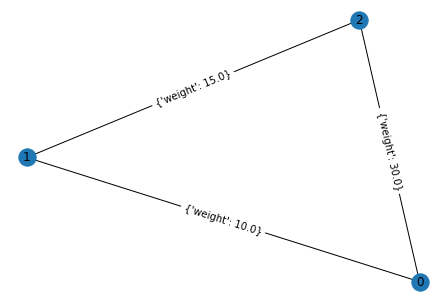

In [22]:
plot_grafica(matriz2, False, True)

******** ALGORITMO DE PRIM ********

Aristas			Peso
0 --- 1 		 10.0
1 --- 2 		 15.0
___________________________
Costo total 	 25.0


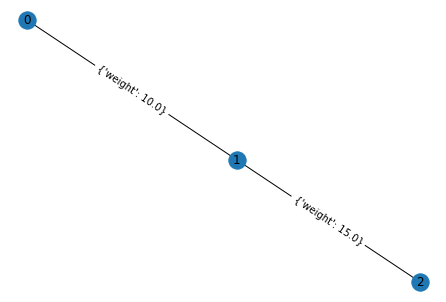

In [23]:
prim_matriz2 = prim(matriz2)
plot_grafica(prim_matriz2, False, True)

#### EJEMPLO 2
Ahora a K4

******** ALGORITMO DE PRIM ********

Aristas			Peso
0 --- 2 		 8.0
0 --- 1 		 10.0
1 --- 3 		 5.0
___________________________
Costo total 	 23.0


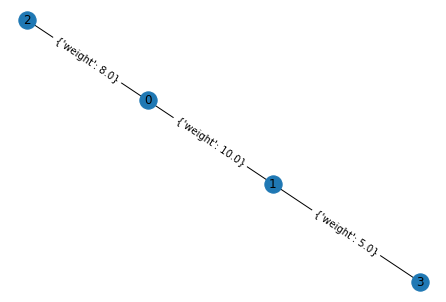

In [24]:
prim_K4 = prim(matriz_K4)
plot_grafica(prim_K4, False, True)

#### EJEMPLO 3
Aplicamos prim a una gráfica de orden 10

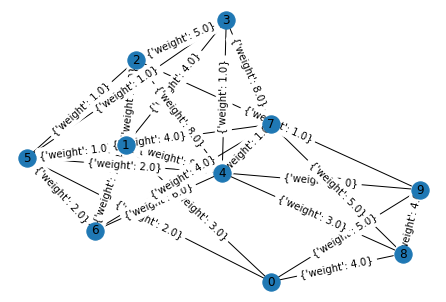

In [25]:
lista_n_10 = [[(1, 3), (9, 5), (5, 2), (8, 4)], [(0, 3), (2, 5), (5, 1), (4, 8), (6, 7), (3, 4), (6, 7)], [(1, 5), (3, 4), (4, 8), (5, 6), (3, 5), (5, 7), (5, 1), (9, 1)], [(2, 4), (4, 1), (5, 1), (2, 5), (7, 6), (7, 8), (1, 4)], [(3, 1), (5, 2), (6, 5), (2, 8), (5, 2), (7, 1), (1, 8), (8, 3), (9, 5), (8, 3), (6, 6)], [(4, 2), (6, 8), (1, 1), (2, 6), (3, 1), (4, 2), (6, 2), (2, 7), (2, 1), (0, 2), (7, 4)], [(5, 8), (7, 4), (4, 5), (5, 2), (1, 7), (4, 6), (1, 7)], [(6, 4), (8, 5), (4, 1), (3, 6), (3, 8), (5, 4)], [(7, 5), (9, 4), (4, 3), (0, 4), (4, 3)], [(8, 4), (0, 5), (4, 5), (2, 1)]]
matriz_n_10 = convert_list_mat_ponderada(lista_n_10)
plot_grafica(matriz_n_10, False, True)

******** ALGORITMO DE PRIM ********

Aristas			Peso
0 --- 5 		 2.0
5 --- 1 		 1.0
5 --- 2 		 1.0
2 --- 9 		 1.0
5 --- 3 		 1.0
3 --- 4 		 1.0
4 --- 7 		 1.0
5 --- 6 		 2.0
4 --- 8 		 3.0
___________________________
Costo total 	 13.0


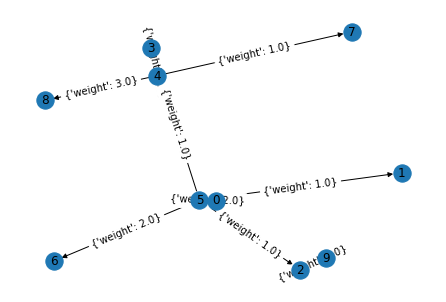

In [26]:
prim_n_10 = prim(matriz_n_10)
plot_grafica(prim_n_10, True, True)

<a name="alg4"></a>
___
## <center> ***INSTRUCCIÓN 6: Encontrar árbol óptimo de gráfica (Prim)*** </center>
___

Creemos una gráfica conexa y usemos la función ***prim(matriz de adyacencia).***


Lista de Adyacencia
[[(1, 10)], [(0, 10)]]

Matriz de Adyacencia
[[ 0. 10.]
 [10.  0.]]


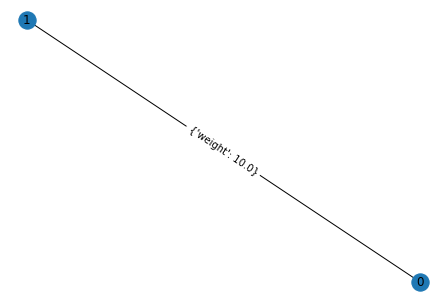

In [27]:
lista_graf_conexa, matriz_grafica_conexa = crear_grafica_ponderada(False, n = 2, m = 1)

Se puede de igual manera usar una matriz de adyacencia tipo *ndarray* de cualquier otra gráfica ponderada.

Creando una variable de la matriz resultante del árbol generador óptimo usando la función ***prim(matriz de adyacencia)*** podemos visualizarla con la función ***plot_grafica(matriz de árbol óptimo)*** .

******** ALGORITMO DE PRIM ********

Aristas			Peso
0 --- 1 		 10.0
___________________________
Costo total 	 10.0


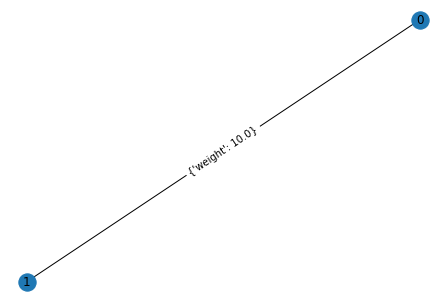

In [28]:
prim_nueva = prim(matriz_grafica_conexa)
plot_grafica(prim_nueva, False, True)

___
___
___
# <center> ALGORITMO DE KRUSKAL </center>

La función ***kruskal_union_find(Lista de Adyacencia Ponderada)*** encontrará el árbol óptimo de la gráfica NO DIRIGIDA y CONEXA.


In [29]:
def kruskal_union_find(grafica):
    """ Algoritmo de Kruskal para encontrar el árbol óptimo.
    :param grafica: Lista de adyacencia ponderada.
    :return: Matriz de adyacencia de arbol óptimo.
    """
    print("********* Algoritmo de Kruskal *********")
    n = len(grafica)
    contador = 0
    lista_vertice = []

    for i in grafica:
        for j in i:
            lista_vertice.append([contador, j[0], j[1]])
        contador = contador + 1
    grafica = lista_vertice

    def find(padre, u):
        if padre[u] != u:
            padre[u] = find(padre, padre[u])
        return padre[u]

    def union(padre, rango, x, y):
        if rango[x] > rango[y]:
            padre[y] = x
        else:
            padre[y] = x
        if rango[x] == rango[y]:
            rango[y] = rango[y] + 1

    def kruskal(grafica, n):
        arbol_optimo = []
        grafica_ordenada = sorted(grafica, key=lambda item: item[2])

        padre = []
        rango = []

        for vertice in range(n):
            padre.append(vertice)
            rango.append(0)

        i = 0
        m = 0

        while m < n - 1:
            u, v, w = grafica_ordenada[i]
            i = i + 1
            x = find(padre, u)
            y = find(padre, v)

            if x != y:
                m = m + 1
                arbol_optimo.append([u, v, w])
                union(padre, rango, x, y)

        costo = 0
        print("\nAristas\t\t\tPeso")
        for i, j, k in arbol_optimo:
            costo = costo + k
            print(str(i) + " --- " + str(j) + "\t\t\t" + str(k))
        print("___________________________")
        print("Costo total \t", str(costo))
        return arbol_optimo

    arbol_optimo = kruskal(grafica, n)
    arbol_optimo = convert_list2_listady(arbol_optimo, n)

    return convert_list_mat_ponderada(arbol_optimo)

#### EJEMPLO 1
Aplicamos kruskal a K4

********* Algoritmo de Kruskal *********

Aristas			Peso
1 --- 3			5
0 --- 2			8
0 --- 1			10
___________________________
Costo total 	 23


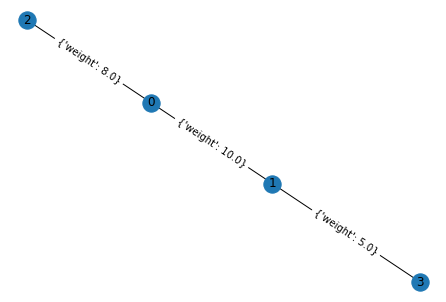

In [30]:
kruskal_ejemplo1 = kruskal_union_find(lista_K4)
plot_grafica(kruskal_ejemplo1, False, True)

#### EJEMPLO 2
Aplicamos Kruskal a gráfica de orden 10

********* Algoritmo de Kruskal *********

Aristas			Peso
1 --- 5			1
2 --- 5			1
2 --- 9			1
3 --- 4			1
3 --- 5			1
4 --- 7			1
0 --- 5			2
5 --- 6			2
4 --- 8			3
___________________________
Costo total 	 13


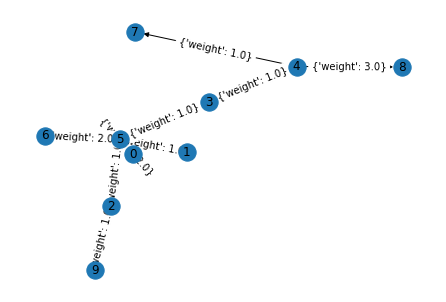

In [31]:
kruskal_n_10 = kruskal_union_find(lista_n_10)
plot_grafica(kruskal_n_10, True, True)

<a name="alg5"></a>
___
## <center> ***INSTRUCCIÓN 7: Encontrar árbol óptimo de gráfica (Kruskal)*** </center>
___

La gráfica creada en [INSTRUCCIÓN 6](#alg4) puede utilzarse aquí también. Creamos una variable ***nuevo_kruskal*** donde se guardará la matriz de adyacencia del árbol óptimo. Visualizamos el árbol con la función ***plot_grafica(Matriz de Adyacencia de árbol óptimo).*** También puede crear una nueva gráfica ponderada con la función ***crear_grafica_ponderada().***

********* Algoritmo de Kruskal *********

Aristas			Peso
0 --- 1			10
___________________________
Costo total 	 10


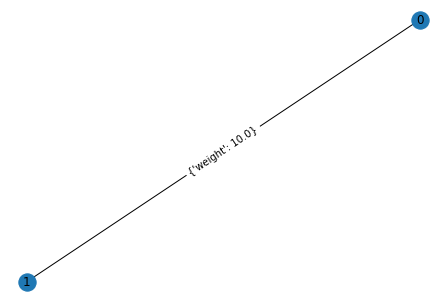

In [32]:
matriz_nuevo_kruskal = kruskal_union_find(nueva_lista_ponderada)
# list_nuevo_kruskal, matriz_nuevo_kruskal =  crear_grafica_ponderada(False, n = 1, m = 0)
plot_grafica(matriz_nuevo_kruskal, False, True)

___
___
___
# <center> ALGORITMO DE DIJKSTRA </center>


In [33]:
def dijkstra(mat_ady, vertice_inicial):
    """ Función para encontrar
    :param mat_ady: Matriz de adyacencia ponderada
    :param vertice_inicial: Cualquier vértice de la gráfica
    :return Matriz ponderada con topología estrella donde el vértice central es el vértice inicial.
    """
    print("******** Algoritmo de Dijkstra ********")
    n = len(mat_ady)
    marcado = [False for i in range(n)]
    d = [float('inf') for i in range(n)]
    d[vertice_inicial] = 0
    lista_ady_ponderada = [[] for i in range(n)]

    for i in range(n):
        vertice_min = 1

        for j in range(len(d)):
            if (vertice_min == -1 or d[vertice_min]>d[j] and marcado[j] == False):
                vertice_min = j
        marcado[vertice_min] = True

        for k in range(n):
            if mat_ady[vertice_min][k] != 0 and marcado[k] == False:
                d_nueva = d[vertice_min] + mat_ady[vertice_min][k]
                if d_nueva < d[k]:
                    d[k] = d_nueva
    for i in range(n):
        print(vertice_inicial, " --- ", i, ' ', d[i])
        lista_ady_ponderada[vertice_inicial].append((i, d[i]))

    return convert_list_mat_ponderada(lista_ady_ponderada)

#### EJEMPLO 1 (Gráfica no dirigida)

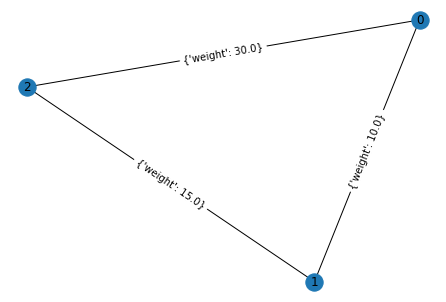

In [34]:
plot_grafica(matriz2,False, True)

******** Algoritmo de Dijkstra ********
0  ---  0   0
0  ---  1   10.0
0  ---  2   25.0


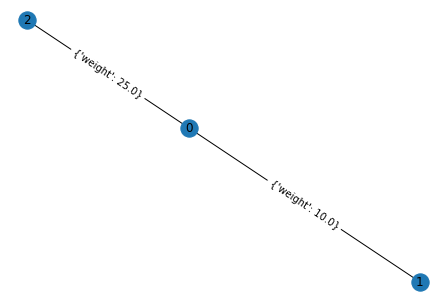

In [35]:
matriz2_dijkstra = dijkstra(matriz2,0)
plot_grafica(matriz2_dijkstra, False, True)

#### EJEMPLO 2 (Digráfica)

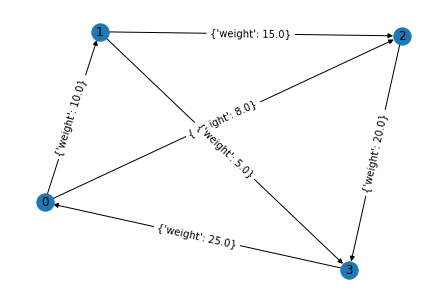

In [36]:
plot_grafica(matriz_K4,True, True)

******** Algoritmo de Dijkstra ********
0  ---  0   0
0  ---  1   10.0
0  ---  2   8.0
0  ---  3   15.0


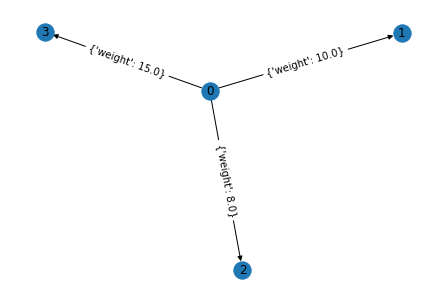

In [37]:
matriz_K4_dijkstra = dijkstra(matriz_K4,0)
plot_grafica(matriz_K4_dijkstra, True, True)

******** Algoritmo de Dijkstra ********
2  ---  0   45.0
2  ---  1   55.0
2  ---  2   0
2  ---  3   20.0


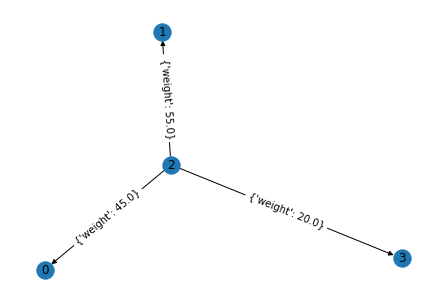

In [38]:
matriz_K4_dijkstra = dijkstra(matriz_K4,2)
plot_grafica(matriz_K4_dijkstra, True, True)

#### EJEMPLO 3 (Gráfica orden 10)

******** Algoritmo de Dijkstra ********
0  ---  0   0
0  ---  1   3.0
0  ---  2   3.0
0  ---  3   3.0
0  ---  4   4.0
0  ---  5   2.0
0  ---  6   4.0
0  ---  7   6.0
0  ---  8   4.0
0  ---  9   5.0


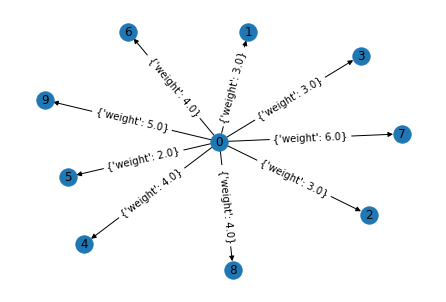

In [39]:
n_10_dijkstra = dijkstra(matriz_n_10,0)
plot_grafica(n_10_dijkstra, True, True)

******** Algoritmo de Dijkstra ********
4  ---  0   4.0
4  ---  1   3.0
4  ---  2   3.0
4  ---  3   1.0
4  ---  4   0
4  ---  5   2.0
4  ---  6   4.0
4  ---  7   1.0
4  ---  8   3.0
4  ---  9   5.0


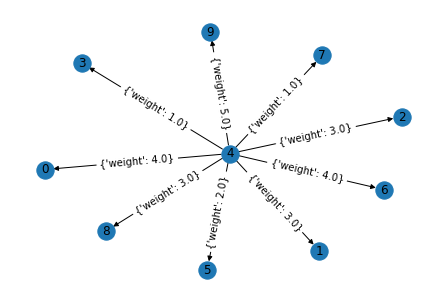

In [40]:
n_10_dijkstra = dijkstra(matriz_n_10,4)
plot_grafica(n_10_dijkstra, True, True)

<a name="alg6"></a>
___
## <center> ***INSTRUCCIÓN 7: Encontrar ruta más corta desde un vértice inicial con Dijkstra*** </center>
___

La gráfica creada en [INSTRUCCIÓN 6](#alg4) puede utilzarse aquí también. Aplicamos la función ***dijkstra(matriz ponderada, vértice inicial).*** También puede crear una gráfica ponderada conexa con la función ***crear_grafica_ponderada().***

In [41]:
matriz_grafica_dijkstra = dijkstra(matriz_grafica_conexa, 0)
# list_grafica_dijkstra, matriz_grafica_dijkstra = crear_grafica_ponderada(False, n = 1, m = 0)

******** Algoritmo de Dijkstra ********
0  ---  0   0
0  ---  1   10.0


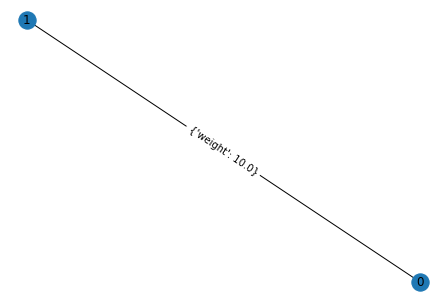

In [42]:
plot_grafica(matriz_grafica_dijkstra, False, True)